# [9660] Adaptive Boosting
Data file:
* sklearn : wine

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/03/24 14:17:55


### Import libraries

In [2]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Load data

In [3]:
wine = load_wine()

### Prepare data

In [4]:
# Separate independent and dependent variables
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [5]:
# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.20, random_state=42)

### Train decision tree stump model

In [6]:
# Instantiate the DecisionTreeClassifier model
#  NOTE: max_depth=1
model_dt = DecisionTreeClassifier(max_depth=1, random_state=42)

In [7]:
# Print model hyperparameters
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [8]:
# Train DecisionTreeClassifier model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

### Calculate decision tree stump model accuracy

In [9]:
training_score = accuracy_score(y_train, model_dt.predict(X_train))
print(f"Decision tree stump training accuracy: {(training_score * 100):.2f}%")
test_score = accuracy_score(y_test, model_dt.predict(X_test))
print(f"Decision tree stump test accuracy: {(test_score * 100):.2f}%")


Decision tree stump training accuracy: 66.20%
Decision tree stump test accuracy: 58.33%


### Train adaptive boosting model

In [10]:
# Instantiate the AdaBoostClassifier model
model_ab = AdaBoostClassifier(estimator=model_dt, random_state=42)

In [11]:
# Print default AdaBoostClassifier hyperparameters
model_ab.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 1,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 42,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=1, random_state=42),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [12]:
# Train AdaBoostClassifier model
model_ab.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

### Calculate adaptive boosting model accuracy

In [13]:
training_score = accuracy_score(y_train, model_ab.predict(X_train))
print(f"AdaBoost training accuracy: {(training_score * 100):.2f}%")
test_score = accuracy_score(y_test, model_ab.predict(X_test))
print(f"AdaBoost test accuracy: {(test_score * 100):.2f}%")

AdaBoost training accuracy: 92.96%
AdaBoost test accuracy: 83.33%


### Measure the effect of hyperparameter: n_estimators

In [14]:
%%time

# Train several AdaBoost models with different n_estimators values
num_estimators = list(range(2, 25, 1))
results = []

for i in num_estimators:
    model_ab = AdaBoostClassifier(estimator=model_dt,
                                  n_estimators=i,
                                  learning_rate=0.5,
                                  random_state=42)
    model_ab.fit(X_train, y_train)
    test_score = accuracy_score(y_test, model_ab.predict(X_test))
    results.append(test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

CPU times: user 1.27 s, sys: 41.5 ms, total: 1.31 s
Wall time: 2.62 s


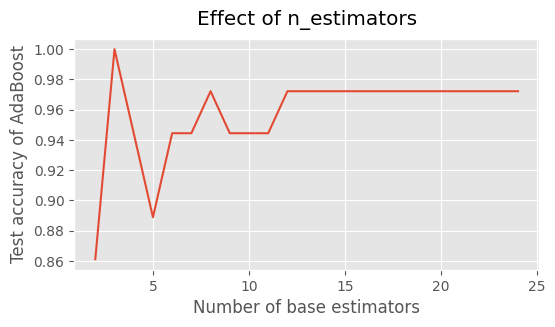

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.title("Effect of n_estimators", pad=10)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(num_estimators, results)
plt.show()

### Measure the effect of hyperparameter: learning_rate
The learning_rate is the weight applied to each classifier at each boosting iteration.  
A higher learning rate increases the contribution of each classifier.

In [16]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [17]:
%%time

# Train several AdaBoost models with different learning_rate values
learning_rates = np.linspace(0.1, 1, 10)
results = []

for i in learning_rates:
    model_ab = AdaBoostClassifier(estimator=model_dt,
                                  learning_rate=i,
                                  random_state=42)
    model_ab.fit(X_train, y_train)
    test_score = accuracy_score(y_test, model_ab.predict(X_test))
    results.append(test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

CPU times: user 1.86 s, sys: 48 ms, total: 1.91 s
Wall time: 4.69 s


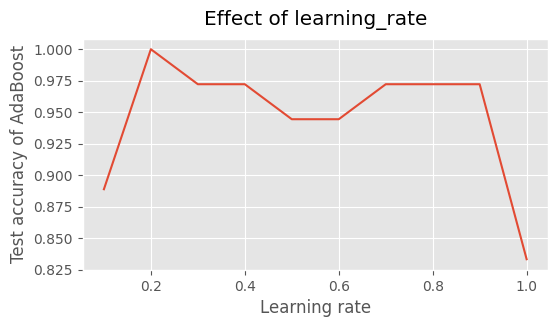

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.title("Effect of learning_rate", pad=10)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(learning_rates, results)
plt.show()

### Find the optimal hyperparameter values using Grid Search

In [19]:
# Create the hyperparameter grid
grid = {
    'n_estimators': list(range(2, 25, 1)),
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
pprint(grid)

{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'n_estimators': [2,
                  3,
                  4,
                  5,
                  6,
                  7,
                  8,
                  9,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24]}


In [20]:
%%time

# Instantiate GridSearchCV
gs = GridSearchCV(AdaBoostClassifier(estimator=model_dt,
                                     random_state=42),
                  param_grid=grid,
                  scoring="accuracy", cv=5,
                  verbose=1, n_jobs=-1,
                  return_train_score=True)

# Execute GridSearchCV
gs.fit(X_train, y_train)

Fitting 5 folds for each of 230 candidates, totalling 1150 fits
CPU times: user 1.76 s, sys: 182 ms, total: 1.94 s
Wall time: 52.9 s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

### Review best hyperparameters and training & test accuracy scores from grid search

In [21]:
# GridSearchCV attribute best_params_ is the hyperparameter combination that
#  gave the best results on the hold out data
print(f"Optimal hyperparameter combination: {gs.best_params_}")

Optimal hyperparameter combination: {'learning_rate': 0.7, 'n_estimators': 18}


In [22]:
# Best estimator's hyperparameters
gs.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 1,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 42,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=1, random_state=42),
 'learning_rate': 0.7,
 'n_estimators': 18,
 'random_state': 42}

In [23]:
# GridSearchCV attribute best_score_ is the mean cross-validated score of the
#  best_estimator_
print(f"AdaBoost mean cross-validated training accuracy score: {np.round(gs.best_score_ * 100,2)}%")

AdaBoost mean cross-validated training accuracy score: 95.15%


In [24]:
# Make predictions on test set
y_pred = gs.best_estimator_.predict(X_test)

# Calculate test accuracy
print(f"AdaBoost best estimator test accuracy: {np.round(accuracy_score(y_test, y_pred) * 100, 2)}%")

AdaBoost best estimator test accuracy: 94.44%


### Train best estimator from grid search on full training set

In [25]:
best_ab_model = gs.best_estimator_
best_ab_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.7, n_estimators=18, random_state=42)

### Display best estimator's accuracy

In [26]:
# Make predictions on test set
y_pred = best_ab_model.predict(X_test)
print(f"AdaBoost best estimator test accuracy: {np.round(accuracy_score(y_test, y_pred) * 100, 2)}%")

AdaBoost best estimator test accuracy: 94.44%
